## Importing Library

In [3]:
from __future__ import print_function
import keras  # importing everything from keras (mainly for the Keras models, layers etc...)
from keras.preprocessing.image import ImageDataGenerator # to be used Generate batches of tensor image
from keras.models import Sequential # Sequential model 
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization  # 
from keras.layers import Conv2D,MaxPooling2D # to use convolutional neural network
from keras.optimizers import RMSprop,SGD,Adam  #  to validate accuracy and loss in our sequential  model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os # to operate with the file system of the project
import pandas as pd # to be used along the confusion matrix
import seaborn as sn # to be used along the confusion matrix
from imutils import paths # to operate with the path structure of the project
import matplotlib.pyplot as plt # to plot the results over the given training duration
from sklearn.metrics import confusion_matrix, classification_report # to produce a confusion matrix 
from keras.preprocessing.image import ImageDataGenerator # to preprocess the image data before feeding it into the model
from numpy import argmax # to return the indices in max element in an array (used in the confusion matrix)
import datetime # to calculate the training duration

## Global Parameters

In [4]:
print("[INFO] Setting up goblal parameters...")
num_classes = 7        #  no of output features
img_rows,img_cols = 48,48       # 48 by 48 pixel images gray scale image
batch_size = 32        # batch size 32. 
epochs=25       


[INFO] Setting up goblal parameters...


## Datasets Directories 

In [6]:
train_data_dir = 'Users\\Haier\\Downloads\\Compressed\\Data Set\\images\\images\\train'
validation_data_dir = 'C:\\Users\\Haier\\Downloads\\Compressed\\Data Set\\images\\images\\validation'



# Data Generator and Augment

In [7]:
print("[INFO] building data generators...\n")

# Generate batches of tensor image data with real-time data augmentation.
train_datagen = ImageDataGenerator(rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                width_shift_range=0.4,
                height_shift_range=0.4,
                horizontal_flip=True,
                fill_mode='nearest')


# Normalized images
validation_datagen = ImageDataGenerator(rescale=1./255)

# transforming train images and masks together.
train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(img_rows,img_cols),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)


# transforming validatiom images and masks together.
validation_generator = validation_datagen.flow_from_directory(
                        validation_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)



[INFO] building data generators...

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Model Creation (Classifier) 

In [8]:
model = Sequential() # sequential model is initialize

# model structutr 1
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# model structutr 2

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


# model structutr 3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# model structutr 4

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# model structutr 5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model structutr 6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model structutr 7
# final layer must be softmax [its return probability ]

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [9]:
# checking the model structure
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

## Saving Model  and Earley  Stop

In [13]:
checkpoint = ModelCheckpoint(r'C:\\Users\\Haier\\OneDrive\\Freelancing Work\\FaceDetection\\Emotion_little_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=4,           
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=4,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]




## Training Model (Classifier)


In [14]:
# compiling the model
print("[INFO] compiling model...")
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

[INFO] compiling model...


In [15]:
# training the model & getting the training duration
print("[INFO] training model...\n")

nb_train_samples = 24176
nb_validation_samples = 3006

print("[INFO] training model...\n")
start = datetime.datetime.now()
history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

end = datetime.datetime.now()
elapsed = end-start

[INFO] training model...

[INFO] training model...

Epoch 1/25
755/755 [==============================] - 1032s 1s/step - loss: 1.8676 - accuracy: 0.2142 - val_loss: 1.7740 - val_accuracy: 0.2705

Epoch 00001: val_loss improved from inf to 1.77402, saving model to C:\\Users\\Haier\\OneDrive\\Freelancing Work\\FaceDetection\Emotion_little_vgg.h5
Epoch 2/25
755/755 [==============================] - 1010s 1s/step - loss: 1.8043 - accuracy: 0.2440 - val_loss: 1.7434 - val_accuracy: 0.2893

Epoch 00002: val_loss improved from 1.77402 to 1.74338, saving model to C:\\Users\\Haier\\OneDrive\\Freelancing Work\\FaceDetection\Emotion_little_vgg.h5
Epoch 3/25
755/755 [==============================] - 1114s 1s/step - loss: 1.7759 - accuracy: 0.2630 - val_loss: 1.7302 - val_accuracy: 0.2923

Epoch 00003: val_loss improved from 1.74338 to 1.73023, saving model to C:\\Users\\Haier\\OneDrive\\Freelancing Work\\FaceDetection\Emotion_little_vgg.h5
Epoch 4/25
755/755 [==============================] - 1

In [16]:
print('training duration: ', elapsed)

training duration:  7:23:29.606717


##  Visualising Results


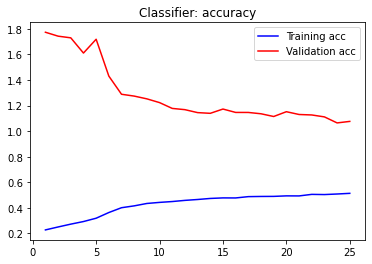

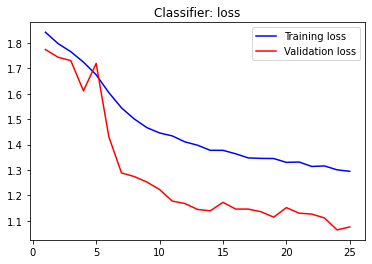

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_loss']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Classifier: accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Classifier: loss')
plt.legend()

plt.show()


In [22]:
loss_v, accuracy_v = model.evaluate(validation_generator, steps=(validation_generator.n / batch_size) + 1, verbose=1)
print("[INFO] Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))


221/221 [==============================] - 66s 299ms/step - loss: 1.0763 - accuracy: 0.5910
[INFO] Validation: accuracy = 0.590999  ;  loss_v = 1.076313


In [31]:
#running predictions
print('[INFO] running predictions for classifier model...\n')

y_pred = model.predict(validation_generator, steps=(validation_generator.n // batch_size) + 1, verbose=1)
y_true = validation_generator.classes[validation_generator.index_array]


[INFO] running predictions for classifier model...

221/221 [==============================] - 63s 284ms/step


## Analyse Convergence

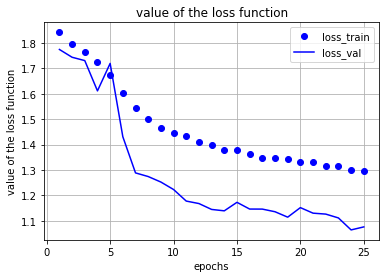

In [44]:
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()

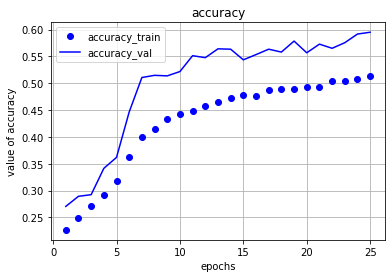

In [45]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()